In [1]:
using DataFrames, CSV, Plots, GLM, Statistics, StatsPlots, MLBase, Distributions, StatsBase, StatsModels

In [2]:
cd("/Users/ning/Dropbox/Working_Directory/Tex_MD/Teaching/tutorial/6002/W3/2021S1")

# Q1

In [3]:
df = DataFrame(CSV.File("mba3.csv"));

first(df,5)

,salary,testsc,wam,libsize,rank
,Int64,Float64,Float64,Int64,Int64
1,131400,10.33,3.15,216,128
2,133098,10.67,3.5,256,104
3,132870,10.33,3.25,424,34
4,135000,10.47,3.2,329,49
5,133606,10.8,3.38,332,95


In [4]:
last(df,5)

,salary,testsc,wam,libsize,rank
,Int64,Float64,Float64,Int64,Int64
1,131700,10.73,3.4,311,98
2,130410,10.33,3.16,220,124
3,130150,10.13,3.12,230,157
4,131300,10.33,3.12,230,145
5,133200,10.67,3.66,157,91


In [5]:
size(df)

(250, 5)

## summary stat

In [6]:
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,salary,139752.0,124900,134400.0,179000,0,Int64
2,testsc,10.5869,9.67,10.53,11.4,0,Float64
3,wam,3.31416,2.73,3.3,3.82,0,Float64
4,libsize,354.928,124,310.5,1745,0,Int64
5,rank,79.54,1,79.0,174,0,Int64


In [7]:
names(df)

5-element Vector{String}:
 "salary"
 "testsc"
 "wam"
 "libsize"
 "rank"

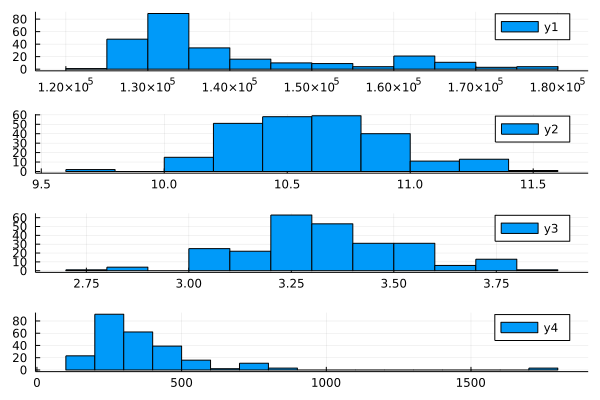

In [8]:
histogram([df[:,:salary],df[:,:testsc],df[:,:wam],df[:,:libsize]], layout=(4,1))

In [9]:
df[!,:log_salary]  = log.(df[:,:salary]);
df[!,:log_libsize] = log.(df[:,:libsize]);

In [10]:
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,salary,139752.0,124900,134400.0,179000,0,Int64
2,testsc,10.5869,9.67,10.53,11.4,0,Float64
3,wam,3.31416,2.73,3.3,3.82,0,Float64
4,libsize,354.928,124,310.5,1745,0,Int64
5,rank,79.54,1,79.0,174,0,Int64
6,log_salary,11.8436,11.7353,11.8086,12.0951,0,Float64
7,log_libsize,5.76225,4.82028,5.73818,7.46451,0,Float64


## log transform fix the kurtosis and skewness issue

In [11]:
skewness(df[!,:log_libsize])

0.8782906848642168

In [12]:
skewness(df[!,:libsize])

3.7368726364323956

In [13]:
skewness(df[!,:log_salary])

1.205922420116392

In [14]:
skewness(df[!,:salary])

1.3090396070094497

In [15]:
kurtosis(df[!,:log_libsize])

1.617268324102291

In [16]:
kurtosis(df[!,:libsize])

20.354281635960024

In [17]:
kurtosis(df[!,:log_salary])

0.22269009385077965

In [18]:
kurtosis(df[!,:salary])

0.5207456694695285

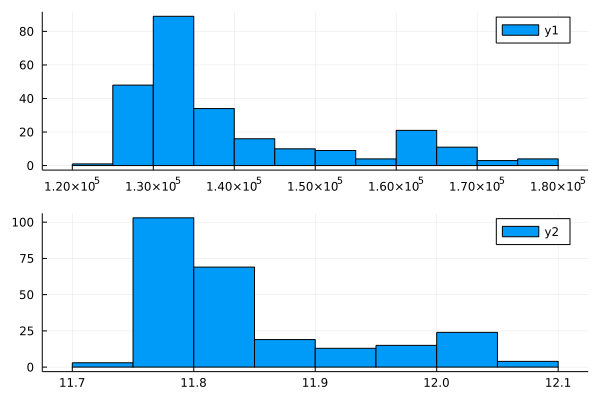

In [19]:
histogram([df[:,:salary],df[:,:log_salary]], layout=(2,1))

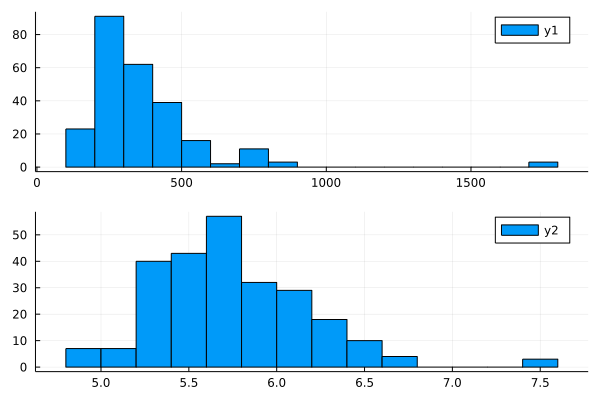

In [20]:
histogram([df[:,:libsize],df[:,:log_libsize]], layout=(2,1))

## regression

In [21]:
fm = @formula(log_salary ~ 1 + testsc + wam + log_libsize + rank)
OLS_model = lm(fm, df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

log_salary ~ 1 + testsc + wam + log_libsize + rank

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error       t  Pr(>|t|)    Lower 95%     Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)  10.9997      0.143083     76.88    <1e-99  10.7179      11.2816
testsc        0.0501107   0.016696      3.00    0.0030   0.0172246    0.0829968
wam           0.0480272   0.0233771     2.05    0.0410   0.00198156   0.0940728
log_libsize   0.0396864   0.00886083    4.48    <1e-04   0.0222333    0.0571395
rank         -0.00093646  9.0028e-5   -10.40    <1e-20  -0.00111379  -0.000759132
─────────────────────────────────────────────────────────────────────────────────

## left-tail t-test

In [22]:
function t_test_left(OLS_model, hyp_val, sig_level, coef_ind)
    
    t_val = (coef(OLS_model)[coef_ind] - hyp_val)/stderror(OLS_model)[coef_ind];
    p_left = cdf(TDist(dof_residual(OLS_model)), t_val)

    println("the left-tail p-value is ", p_left, "\n")
    
    d = TDist(dof_residual(OLS_model))

    lower_bar = -1 * abs(t_val) - 3
    upper_bar = abs(t_val) + 3

    lb = quantile(d, sig_level)

    rg_low = range(lower_bar, lb; length = 100)
    rg_upp = range(lb, upper_bar; length = 100)

    plot(rg_low, pdf.(d, rg_low), fillrange = 0, fillalpha = 0.35, c = "red", lw = 3, label = "rejection region", legend = :topleft)
    plot!(rg_upp, pdf.(d, rg_upp), fillrange = 0, fillalpha = 0.35, c = 1, lw = 3, label = "non-rejection region", legend = :topleft)
    display(plot!([t_val], seriestype = :vline, c="green", linewidth=3, label="test stat", title="leftt-tail t-test"))
    
    return round(t_val, digits=5), round(p_left, digits=5)
    
end

t_test_left (generic function with 1 method)

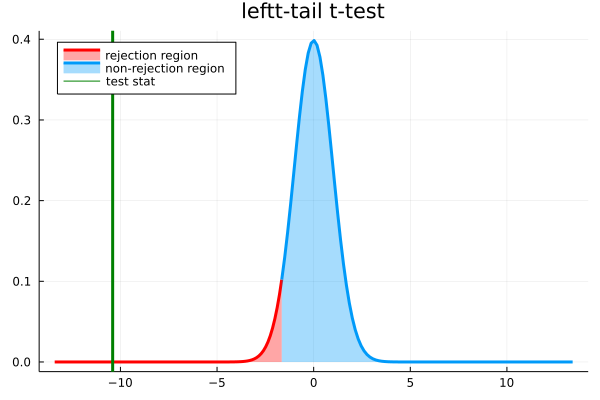

the left-tail p-value is 1.5825977318158324e-21



(-10.40187, 0.0)

In [23]:
hyp_val   = 0;
sig_level = 0.05;

tval, pval = t_test_left(OLS_model, hyp_val, sig_level, 5)

## F-test

In [24]:
nullmodel = lm(@formula(log_salary ~ 1 + log_libsize + rank), df);
model     = lm(@formula(log_salary ~ 1 + testsc + wam + log_libsize + rank), df);

ftest(nullmodel.model, model.model)

F-test: 2 models fitted on 250 observations
────────────────────────────────────────────────────────────────
     DOF  ΔDOF     SSR     ΔSSR      R²     ΔR²       F*   p(>F)
────────────────────────────────────────────────────────────────
[1]    4        0.4551           0.7645                         
[2]    6     2  0.4006  -0.0545  0.7927  0.0282  16.6737  <1e-06
────────────────────────────────────────────────────────────────

## test the slopes of testsc and wam are equal in population

In [25]:
df[!,:z] = df[:,:testsc] + df[:,:wam];

In [26]:
describe(df[!,:z])

Summary Stats:
Length:         250
Missing Count:  0
Mean:           13.901040
Minimum:        12.400000
1st Quartile:   13.552500
Median:         13.830000
3rd Quartile:   14.177500
Maximum:        15.220000
Type:           Float64


In [27]:
fm1 = @formula(log_salary ~ 1 + testsc + z + log_libsize + rank)
OLS_model1 = lm(fm1, df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

log_salary ~ 1 + testsc + z + log_libsize + rank

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error       t  Pr(>|t|)    Lower 95%     Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)  10.9997      0.143083     76.88    <1e-99  10.7179      11.2816
testsc        0.00208351  0.0361132     0.06    0.9540  -0.0690485    0.0732155
z             0.0480272   0.0233771     2.05    0.0410   0.00198156   0.0940728
log_libsize   0.0396864   0.00886083    4.48    <1e-04   0.0222333    0.0571395
rank         -0.00093646  9.0028e-5   -10.40    <1e-20  -0.00111379  -0.000759132
─────────────────────────────────────────────────────────────────────────────────

In [28]:
function t_test_two(OLS_model, hyp_val, sig_level, coef_ind)
    
    t_val = (coef(OLS_model)[coef_ind] - hyp_val)/stderror(OLS_model)[coef_ind];
    p_two = 2 * cdf(TDist(dof_residual(OLS_model)), -1*abs(t_val))

    println("the two-tail p-value is ", p_two, "\n")
        
    d = TDist(dof_residual(OLS_model))

    lower_bar = -1 * abs(t_val) - 3
    upper_bar = abs(t_val) + 3

    lb = quantile(d, sig_level/2)
    ub = quantile(d, 1-sig_level/2)

    rg_low = range(lower_bar, lb; length = 100)
    rg_upp = range(ub, upper_bar; length = 100)
    rg_mid = range(lb, ub; length = 100)

    plot(rg_low, pdf.(d, rg_low), fillrange = 0, fillalpha = 0.35, c = "red", lw = 3, label = "rejection region", legend = :topleft)
    plot!(rg_upp, pdf.(d, rg_upp), fillrange = 0, fillalpha = 0.35, c = "red", lw = 3, label = false, legend = :topleft)
    plot!(rg_mid, pdf.(d, rg_mid), fillrange = 0, fillalpha = 0.35, c = 1, lw = 3, label = "non-rejection region", legend = :topleft)
    display(plot!([t_val], seriestype = :vline, c="green", linewidth=3, label="test stat", title="two-tail t-test"))
    
    return round(t_val, digits=5), round(p_two, digits=5)
    
end

t_test_two (generic function with 1 method)

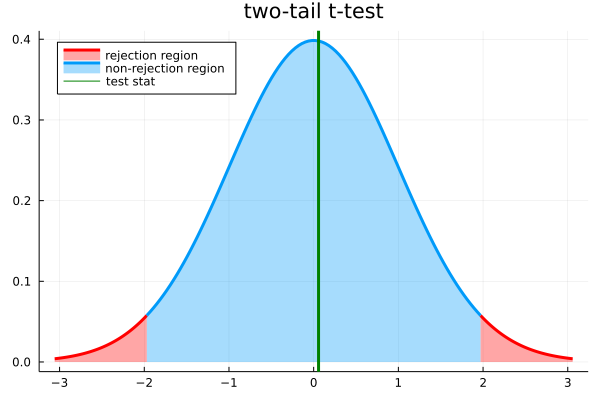

the two-tail p-value is 0.9540394525337553



(0.05769, 0.95404)

In [29]:
hyp_val   = 0;
sig_level = 0.05;

tval, pval = t_test_two(OLS_model1, hyp_val, sig_level, 2)

# Q2

In [30]:
df = DataFrame(CSV.File("nbasal.csv"));

first(df,5)

,marr,wage,exper,age,coll,games,minutes,guard,forward,center,points
,Int64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64
1,1,1002.5,4,27,4,77,2867,1,0,0,15.5
2,1,2030.0,5,28,4,78,2789,1,0,0,13.3
3,0,650.0,1,25,4,74,1149,0,0,1,5.5
4,0,2030.0,5,28,4,47,1178,0,1,0,7.3
5,0,755.0,3,24,4,82,2096,1,0,0,10.8


In [31]:
names(df)

22-element Vector{String}:
 "marr"
 "wage"
 "exper"
 "age"
 "coll"
 "games"
 "minutes"
 "guard"
 "forward"
 "center"
 "points"
 "rebounds"
 "assists"
 "draft"
 "allstar"
 "avgmin"
 "lwage"
 "black"
 "children"
 "expersq"
 "agesq"
 "marrblck"

## (a)

In [32]:
fm = @formula(points ~ 1 + exper + expersq + age + coll)
OLS_model = lm(fm, df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

points ~ 1 + exper + expersq + age + coll

Coefficients:
───────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)  Lower 95%   Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  35.2183      6.98673     5.04    <1e-06  21.4615    48.9751
exper         2.36363     0.405497    5.83    <1e-07   1.56521    3.16205
expersq      -0.0770269   0.0234833  -3.28    0.0012  -0.123265  -0.0307885
age          -1.07396     0.295072   -3.64    0.0003  -1.65495   -0.492964
coll         -1.28625     0.450592   -2.85    0.0047  -2.17347   -0.399043
───────────────────────────────────────────────────────────────────────────

## (b)

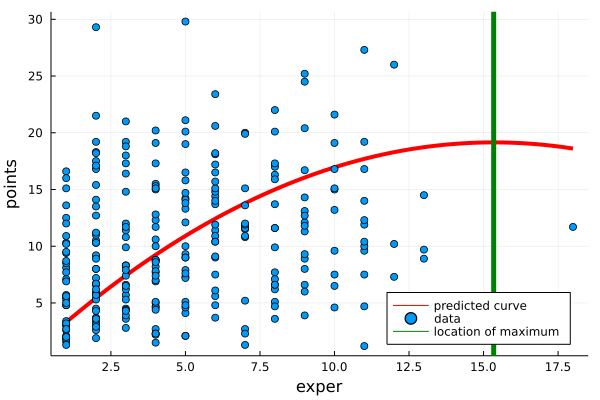

In [33]:
x = minimum(df[:,:exper]):0.01:maximum(df[:,:exper]);

y = coef(OLS_model)[1] .+ coef(OLS_model)[2] * x .+ coef(OLS_model)[3] * x.^2 .+ coef(OLS_model)[4] * mean(df[:,:age]) .+ coef(OLS_model)[5] * mean(df[:,:coll]);

x_loc = x[findmax(y)[2]]

plot(xlabel="exper", ylabel="points", legend=:bottomright)
plot!(x,y, label="predicted curve", c="red", lw=4)
scatter!(df[:,:exper], df[:,:points], c=1, label="data")
plot!([x_loc], seriestype = :vline, c="green", linewidth=5, label="location of maximum")

## (d)

In [34]:
fm = @formula(points ~ 1 + exper + expersq + age + agesq + coll)
OLS_model = lm(fm, df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

points ~ 1 + exper + expersq + age + agesq + coll

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)   Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  73.5903     35.9334      2.05    0.0416   2.83656    144.344
exper         2.86383     0.612724    4.67    <1e-05   1.65736      4.0703
expersq      -0.128072    0.0524378  -2.44    0.0153  -0.231324    -0.0248209
age          -3.98369     2.68908    -1.48    0.1397  -9.27856      1.31117
agesq         0.0535514   0.0491917   1.09    0.2773  -0.0433083    0.150411
coll         -1.3126      0.451084   -2.91    0.0039  -2.2008      -0.424408
──────────────────────────────────────────────────────────────────

## (e)

In [35]:
fm = @formula(lwage ~ 1 + points + exper + expersq + age + coll)
OLS_model = lm(fm, df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

lwage ~ 1 + points + exper + expersq + age + coll

Coefficients:
──────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)   Lower 95%    Upper 95%
──────────────────────────────────────────────────────────────────────────────
(Intercept)   6.77904     0.845421     8.02    <1e-13   5.11438     8.44369
points        0.0777297   0.00711284  10.93    <1e-22   0.0637243   0.091735
exper         0.217845    0.0497877    4.38    <1e-04   0.119811    0.315878
expersq      -0.00708214  0.00276871  -2.56    0.0111  -0.0125338  -0.00163049
age          -0.0481375   0.0349466   -1.38    0.1695  -0.116948    0.0206732
coll         -0.0402709   0.0528725   -0.76    0.4469  -0.144378    0.0638364
───────────────────────────────────────────────────────

## (g)

In [36]:
fm = @formula(lwage ~ 1 + marr + exper + age + coll + games + minutes + guard + forward + center + points + rebounds + assists + draft + allstar + avgmin + black + children + expersq + agesq + marrblck)
OLS_model = lm(fm, df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

lwage ~ 1 + marr + exper + age + coll + games + minutes + guard + forward + center + points + rebounds + assists + draft + allstar + avgmin + black + children + expersq + agesq + marrblck

Coefficients:
────────────────────────────────────────────────────────────────────────────────────────
                    Coef.     Std. Error       t  Pr(>|t|)      Lower 95%      Upper 95%
────────────────────────────────────────────────────────────────────────────────────────
(Intercept)   0.0          NaN            NaN       NaN     NaN            NaN
marr          0.0962407      0.17783        0.54    0.5889   -0.254228       0.446709
exper         0.206755       0.07285        2.84    0.0050    0.0631814      0.350328
age          -0.447644       0.29851       -1.50    0.1352   -1.03595        0.140661
coll         -0